In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [2]:
tickets = pd.read_csv('cleaned-data/total.csv')

In [3]:
tickets['disposition_type'].value_counts(normalize=True)

Other               0.662185
Liable - System     0.223375
Dismissed           0.060509
Liable              0.051959
Void                0.001100
Continued           0.000558
Administrative      0.000270
Liable - Traffic    0.000045
Name: disposition_type, dtype: float64

In [4]:
# total-paid and fine-amount based on disposition type
tickets.groupby(by = 'disposition_type').mean()[['total_paid','fine_amount']]

,total_paid,fine_amount
disposition_type,,
Administrative,45.118056,55.277778
Continued,40.881128,75.809268
Dismissed,1.020254,75.236103
Liable,45.284069,69.663963
Liable - System,36.907208,60.394485
Liable - Traffic,0.000000,25.630252
Other,47.535042,51.975895
Void,4.320735,59.584610


## Clustering

### K-Means

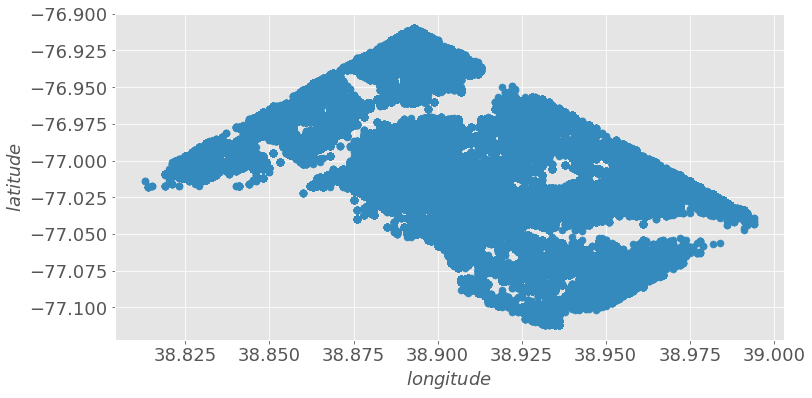

In [5]:
# Plot the scatter
ax = tickets.plot(kind="scatter", x="latitude", y="longitude", figsize=(12,6), s=50)
plt.xlabel("$longitude$", fontsize=18)
plt.ylabel("$latitude$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
tickets.shape

(2669807, 20)

In [7]:
tickets[['latitude','longitude']].describe()

,latitude,longitude
count,2.669807e+06,2.669807e+06
mean,3.890623e+01,-7.702495e+01
std,2.119231e-02,2.670738e-02
min,3.881300e+01,-7.711200e+01
25%,3.889600e+01,-7.704100e+01
50%,3.890300e+01,-7.702700e+01
75%,3.891600e+01,-7.701200e+01
max,3.899400e+01,-7.691000e+01


In [8]:
# Select only latitude and longitude
X = tickets[['latitude','longitude']]

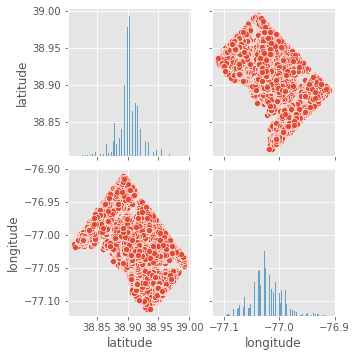

In [10]:
sns.pairplot(X);

In [11]:
# standarize data for preparation
ss = StandardScaler()
ss.fit(X)
X_sc = ss.transform(X)
X_sc[:5]

array([[-0.24696307,  0.7845573 ],
       [-2.88943095,  1.38364279],
       [-2.88943095,  1.38364279],
       [-2.88943095,  1.38364279],
       [-2.88943095,  1.38364279]])

In [12]:
# Instantiate k-means
km = KMeans(n_clusters=3)
km.fit(X_sc)

KMeans(n_clusters=3)

In [13]:
# Check out centroids
km.cluster_centers_

array([[-0.07498641, -0.37087497],
       [-0.83792034,  1.2002911 ],
       [ 1.62304391, -0.62339304]])

In [14]:
# attach predicted cluster to original points
X['cluster'] = km.labels_
X.head(3)

<ipython-input-14-5f1d01be826c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = km.labels_


,latitude,longitude,cluster
0,38.901,-77.004,1
1,38.845,-76.988,1
2,38.845,-76.988,1


In [15]:
# check mean difference
X.groupby(by = 'cluster').mean()

,latitude,longitude
cluster,,
0,38.904606,-77.034816
1,38.888471,-76.992754
2,38.940629,-77.041604


<ipython-input-20-454bd97a3844>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = cl.labels_


Text(0.5, 1.0, 'DC tickets Clustering with 4')

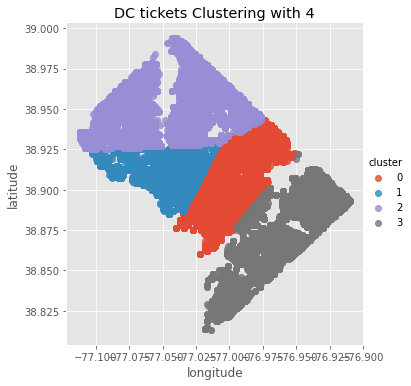

In [20]:
## draw a clustering for cluster level 4
cl = KMeans(n_clusters=4)
cl.fit(X_sc)
X['cluster'] = cl.labels_
centroid_X = pd.DataFrame(
    ss.inverse_transform(km.cluster_centers_),
    columns=['latitude','longitude']
)

sns.lmplot(data=X,x='longitude',y='latitude',hue='cluster',fit_reg=False, legend=True, legend_out=True)
plt.title("DC tickets Clustering with 4")
#plt.scatter(centroid_X['latitude'],centroid_X['longitude'],marker='x');

In [17]:
# average fine-amount and total-paid for clusters
tickets['cluster'] = X['cluster']
tickets.groupby(by = 'cluster').mean()[['fine_amount','total_paid']].sort_values(by='fine_amount',ascending=False)


,fine_amount,total_paid
cluster,,
2,79.512759,31.991349
1,58.296716,42.784281
3,56.641224,43.883015
0,51.123964,42.600705


In [19]:
# sum of fine-amount and total-paid for clusters
tickets.groupby(by = 'cluster').sum()[['fine_amount','total_paid']].sort_values(by='fine_amount',ascending=False)

,fine_amount,total_paid
cluster,,
0,60706589.0,50585738
1,57885433.0,42482438
3,18456826.0,14299500
2,13005743.0,5232761


<ipython-input-104-b9ec33c50a70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = cl.labels_


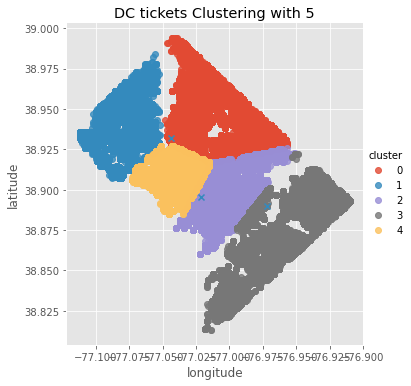

In [104]:
## draw a clustering for cluster level 5
cl = KMeans(n_clusters=5)
cl.fit(X_sc)
X['cluster'] = cl.labels_
centroid_X = pd.DataFrame(
    ss.inverse_transform(km.cluster_centers_),
    columns=['latitude','longitude']
)

sns.lmplot(data=X,x='longitude',y='latitude',hue='cluster',fit_reg=False, legend=True, legend_out=True)
plt.title("DC tickets Clustering with 5")
plt.scatter(centroid_X['latitude'],centroid_X['longitude'],marker='x');

In [21]:
# average fine-amount and total-paid for clusters
tickets['cluster'] = X['cluster']
tickets.groupby(by = 'cluster').mean()[['fine_amount','total_paid']].sort_values(by='fine_amount',ascending=False)

,fine_amount,total_paid
cluster,,
3,80.057620,31.842658
0,58.289718,42.764037
2,56.641224,43.883015
1,51.125682,42.606044


In [22]:
# sum of fine-amount and total-paid for clusters
tickets.groupby(by = 'cluster').sum()[['fine_amount','total_paid']].sort_values(by='fine_amount',ascending=False)

,fine_amount,total_paid
cluster,,
1,60765429.0,50639414
0,58017913.0,42564628
2,18456826.0,14299500
3,12814423.0,5096895


<ipython-input-80-e766fbb6a251>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = cl.labels_


<Figure size 864x720 with 0 Axes>

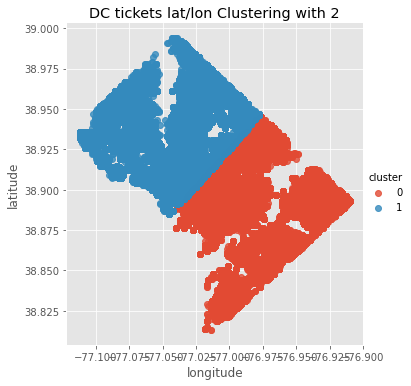

<ipython-input-80-e766fbb6a251>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = cl.labels_


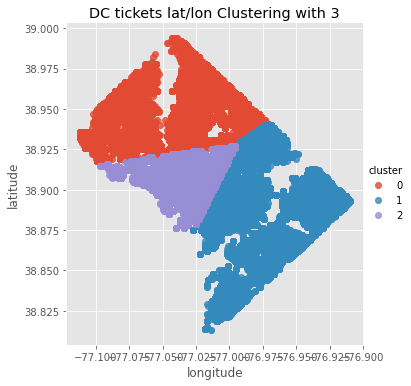

<ipython-input-80-e766fbb6a251>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = cl.labels_


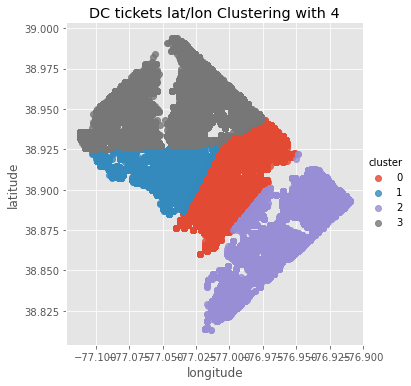

<ipython-input-80-e766fbb6a251>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = cl.labels_


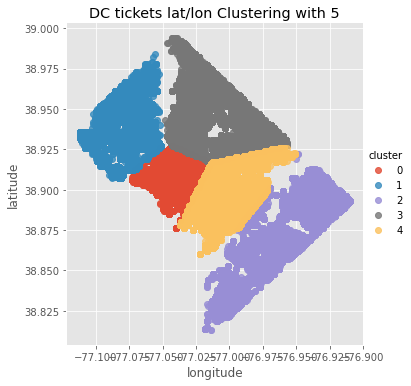

In [80]:
# draw the clusering for cluster 2,3,4,5
plt.figure(figsize=(12,10))
for k in range(2, 6):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    X['cluster'] = cl.labels_   
    centroid_X = pd.DataFrame(
    ss.inverse_transform(cl.cluster_centers_),
    columns=['latitude','longitude']
    )

    sns.lmplot(data=X,x='longitude',y='latitude',hue='cluster',fit_reg=False, legend=True, legend_out=True)
    #plt.scatter(centroid_X['longitude'],centroid_X['latitude'],marker='x')
    plt.title(f"DC tickets lat/lon Clustering with {k}")
    plt.show();

### Clustering with fine_896755

In [22]:
# For DBSCAN clustering, we will use the cleaned-data fine_896755.
df_89 = pd.read_csv('./Data/clean_tickets_dc.csv')

In [23]:
df_89.shape

(896755, 17)

In [24]:
df_89.head()

,Unnamed: 0,objectid,issuing_agency_name,issuing_agency_short,violation_code,violation_proc_desc,disposition_type,fine_amount,total_paid,latitude,longitude,year,month,date,day,hour,minute
0,0,60327097,AMTRAK,AMTRK,P170,FAILURE TO DISPLAY CURRENT TAGS,Dismissed,100.0,0,38.901,-77.004,2017,9,5,1,11,30
1,1,60345241,METRO POLICE,MTP,P039,PARK AT EXPIRED METER,Liable,25.0,60,38.845,-76.988,2017,9,26,1,10,35
2,2,60345242,METRO POLICE,MTP,P039,PARK AT EXPIRED METER,Liable,25.0,60,38.845,-76.988,2017,9,26,1,11,35
3,3,60345243,METRO POLICE,MTP,P170,FAILURE TO DISPLAY CURRENT TAGS,Liable,100.0,240,38.845,-76.988,2017,9,26,1,11,40
4,7,60345247,METRO POLICE,MTP,P039,PARK AT EXPIRED METER,Liable,25.0,60,38.845,-76.988,2017,9,26,1,11,47


In [25]:
X_89 = df_89[['longitude','latitude']]

In [26]:
X_89.shape

(896755, 2)

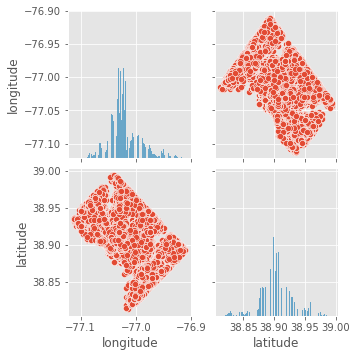

In [27]:
sns.pairplot(X_89);

In [28]:
# Standarize data
X_89_sc = ss.fit_transform(X_89)

In [29]:
X_89_sc[:5]

array([[ 0.52400275, -0.1358641 ],
       [ 1.07532006, -2.54093923],
       [ 1.07532006, -2.54093923],
       [ 1.07532006, -2.54093923],
       [ 1.07532006, -2.54093923]])

In [30]:
X_89

,longitude,latitude
0,-77.004,38.901
1,-76.988,38.845
2,-76.988,38.845
3,-76.988,38.845
4,-76.988,38.845
...,...,...
896750,-77.022,38.898
896751,-77.004,38.900
896752,-76.946,38.901
896753,-76.993,38.837


<ipython-input-107-a4bd1562957d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_89['cluster'] = cl.labels_


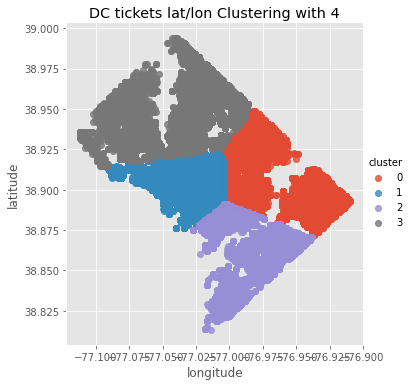

In [107]:
# Cluster with 4
cl = KMeans(n_clusters=4)
cl.fit(X_89_sc)
X_89['cluster'] = cl.labels_   
centroid_X_89 = pd.DataFrame(
ss.inverse_transform(cl.cluster_centers_),
columns=['latitude','longitude']
)

sns.lmplot(data=X_89,x='longitude',y='latitude',hue='cluster',fit_reg=False, legend=True, legend_out=True)
#plt.scatter(x=centroid_X_89['longitude'],y=centroid_X_89['latitude'],marker='x')
plt.title("DC tickets lat/lon Clustering with 4")
plt.show();

In [108]:
# average of fine-amount and total-paid for clusters
df_89['cluster'] = X_89['cluster']
df_89.groupby(by = 'cluster').mean()[['fine_amount','total_paid']].sort_values('fine_amount',ascending = False)

,fine_amount,total_paid
cluster,,
0,72.915753,28.663107
2,72.909250,28.900515
3,66.817237,35.468031
1,59.487730,32.254755


In [109]:
# sum of fine-amount and total-paid for clusters
df_89.groupby(by = 'cluster').sum()[['fine_amount','total_paid']].sort_values('fine_amount',ascending = False)

,fine_amount,total_paid
cluster,,
1,29755465.0,16133667
0,10213820.0,4015042
3,9112802.0,4837272
2,8756328.0,3470923


<ipython-input-110-9f7e3d656115>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_89['cluster'] = cl.labels_


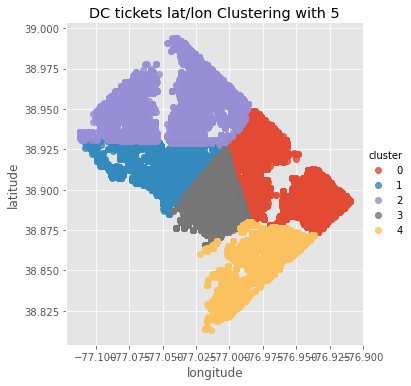

In [110]:
# cluster with 5 
cl = KMeans(n_clusters=5)
cl.fit(X_89_sc)
X_89['cluster'] = cl.labels_   
centroid_X_89 = pd.DataFrame(
ss.inverse_transform(cl.cluster_centers_),
columns=['latitude','longitude']
)

sns.lmplot(data=X_89,x='longitude',y='latitude',hue='cluster',fit_reg=False, legend=True, legend_out=True)
#plt.scatter(x=centroid_X_89['longitude'],y=centroid_X_89['latitude'],marker='x')
plt.title("DC tickets lat/lon Clustering with 5")
plt.show();

In [111]:
# average of fine-amount and total-paid for clusters
df_89['cluster'] = X_89['cluster']
df_89.groupby(by = 'cluster').mean()[['fine_amount','total_paid']].sort_values('fine_amount',ascending = False)

,fine_amount,total_paid
cluster,,
4,86.087677,24.835527
0,75.356167,26.543836
2,67.631377,34.807158
3,63.460249,32.637291
1,57.095333,32.915255


In [112]:
# sum of fine-amount and total-paid for clusters
df_89.groupby(by = 'cluster').sum()[['fine_amount','total_paid']].sort_values('fine_amount',ascending = False)

,fine_amount,total_paid
cluster,,
3,19624955.0,10093017
1,18516930.0,10674944
0,8241930.0,2903179
2,6549152.0,3370586
4,4905448.0,1415178


<ipython-input-75-561a46c911db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_89['cluster'] = cl.labels_


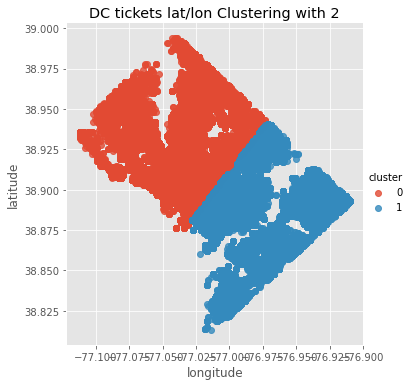

<ipython-input-75-561a46c911db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_89['cluster'] = cl.labels_


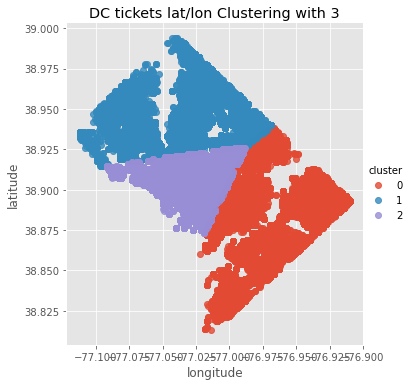

<ipython-input-75-561a46c911db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_89['cluster'] = cl.labels_


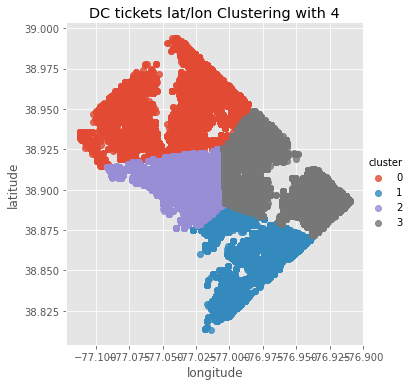

<ipython-input-75-561a46c911db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_89['cluster'] = cl.labels_


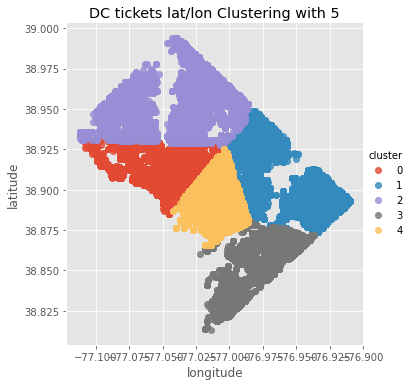

In [75]:
for k in range(2, 6):
    cl = KMeans(n_clusters=k)
    cl.fit(X_89_sc)
    X_89['cluster'] = cl.labels_   
    centroid_X_89 = pd.DataFrame(
    ss.inverse_transform(cl.cluster_centers_),
    columns=['latitude','longitude']
    )
    
    sns.lmplot(data=X_89,x='longitude',y='latitude',hue='cluster',fit_reg=False, legend=True, legend_out=True)
   # plt.scatter(centroid_X_89['longitude'],centroid_X_89['latitude'],marker='x')
    plt.title(f"DC tickets lat/lon Clustering with {k}")
    plt.show();

In [51]:
X.head(2)

,latitude,longitude,cluster
0,38.901,-77.004,4
1,38.845,-76.988,1


In [76]:
df_89['cluster'] = X['cluster']

In [77]:
df_89.groupby(by = 'cluster').mean()[['fine_amount','total_paid']].sort_values(by='fine_amount',ascending=False)

,fine_amount,total_paid
cluster,,
3,23969482.0,11914770
1,20124922.0,9819051
0,6890110.0,3372899
4,3679296.0,1768704
2,3174605.0,1581480


In [54]:
df_89.shape

(896755, 18)